In [1]:
import numpy as np
import math
from DensityCanvas import DensityCanvas
from Lattice import Lattice
import matplotlib.pyplot as plt
from norms import Lp_norm, Lp_distance, KL_distance, JS_distance

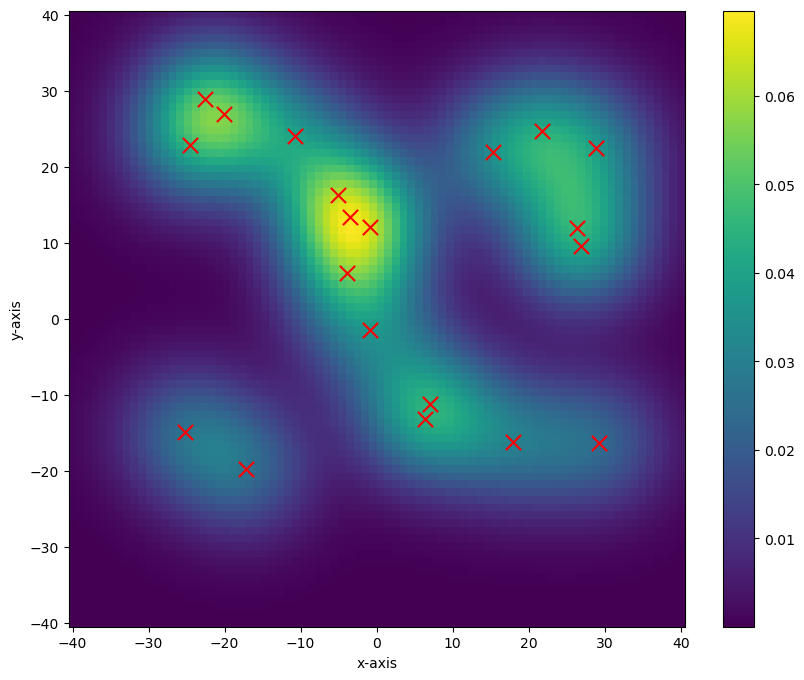

In [29]:
np.random.seed(18382)

# define a canvas
canvas = DensityCanvas(
    origin=(-40,-40),
    length_x=80,
    length_y=80,
    npoints_x=80,
    npoints_y=80,
)

# define a base density as a sum of Gaussians
canvas.set_density_from_gaussians(
    #centers = np.array([[-5,-6], [5,5], [-3,-3]]),
    centers=np.random.rand(20, 2)*60-30,
    amplitude = 5,
    variance = 40,
)

canvas.draw(draw_centers=True)

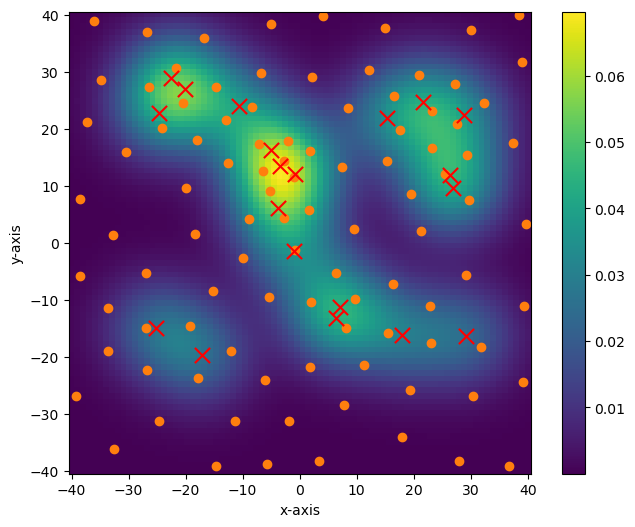

In [44]:
# define a small rectangular lattice
lattice = Lattice.rectangular(num_x=10, num_y=10, spacing=4)
plattice = Lattice.poisson_disk(
    density=canvas._density,
    length=(80, 80),
    spacing=(3, 8),
    max_num=8000,
)
canvas.set_lattice(plattice)
canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))

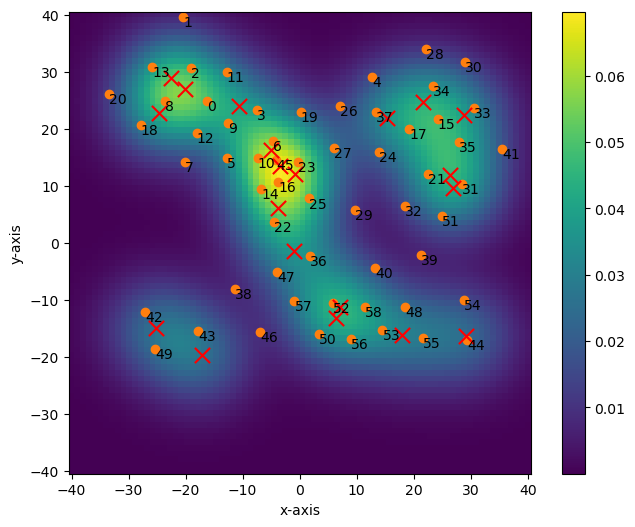

In [41]:
canvas.decimate_lattice(2, [10, 30])
canvas.draw(draw_centers=True, draw_lattice=True, figsize=(8,6))

In [45]:
canvas.lattice_dynamics(
    spacing=5,
    T=1000,
    dt=1,
    viscosity=.1,
    save_history=True
)

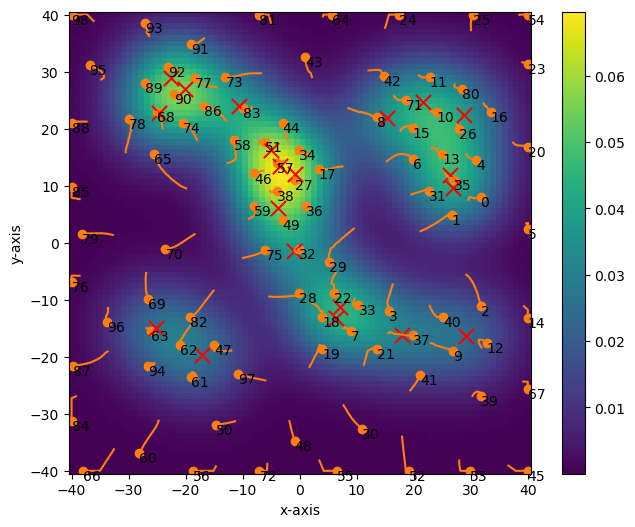

In [46]:
canvas.draw(draw_centers=True, draw_lattice=True, lattice_history=True, figsize=(8,6))

In [ ]:
# idea: restrict LJ interaction so that each particle only feels the potential of nearest neighbour
# this way maybe the minimal distance is indeed sigma/2 instead of being reduced by the ensemble